In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
rand_state= 1000 # 랜덤값 고정 

In [3]:
# let's import the Boston dataset from sklearn.datasets
from sklearn.datasets import load_boston

In [4]:
boston = load_boston() # boston 집값 예측  
boston # 딕셔너리 형태로 줄줄이 출력 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston['data'].shape

(506, 13)

In [7]:
boston['target'].shape

(506,)

In [8]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [9]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- CRIM: 자치시(town) 별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 거주지역의 비율
- INDUX 비소매상업지역이 점유하고 있는 토지의 비율
- CHAS: 찰스강에 대한 더미변수 (강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 10ppm 당 농축 일산화질소
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 5개의 보스턴 직업센터까지의 접근성 지수
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000 달러 당 재산세율
- PTRATIO: 자치시(town)별 학생/교사 비율
- B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
- LSTAT: 모집단의 하위계층의 비율(%)
- MEDV (target) : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [10]:
print(boston.data)
print(type(boston.data))
print(boston.data.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
<class 'numpy.ndarray'>
(506, 13)


In [11]:
print(boston.target)
print(type(boston.target))
print(boston.target.shape)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [12]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [13]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

# adding the targer variable
df['price']= boston.target

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Explanatory Data Analysis: EDA

In [15]:
df.nunique() # unique한 값의 개수 

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
price      229
dtype: int64

In [16]:
df.info() # 요약(information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Since there is no NA values, we move on to the next step!


In [17]:
df['RAD'].value_counts() # RAD, CHAS는 높낮이가 없는 값임을 확인해두자

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [18]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [23]:
df.describe().T # T는 x,y축 반전 

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


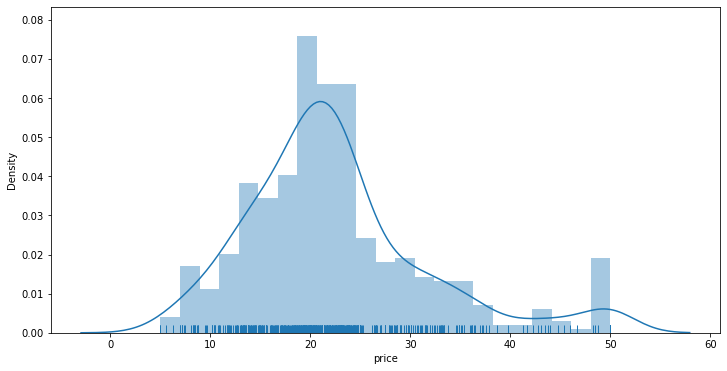

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(df['price'], rug=True)
plt.show()

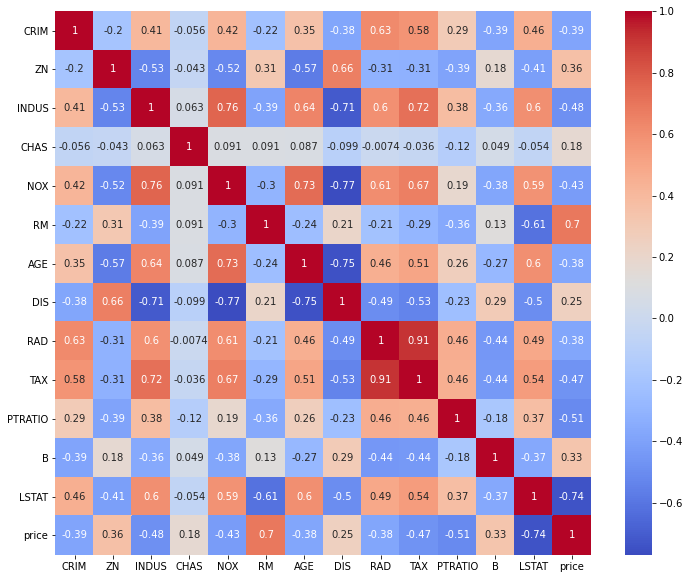

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

# correlation은 -1에서 1 사이의 값 => 1: 완전한 양의 상관관계 / -1: 완전한 음의 상관관계

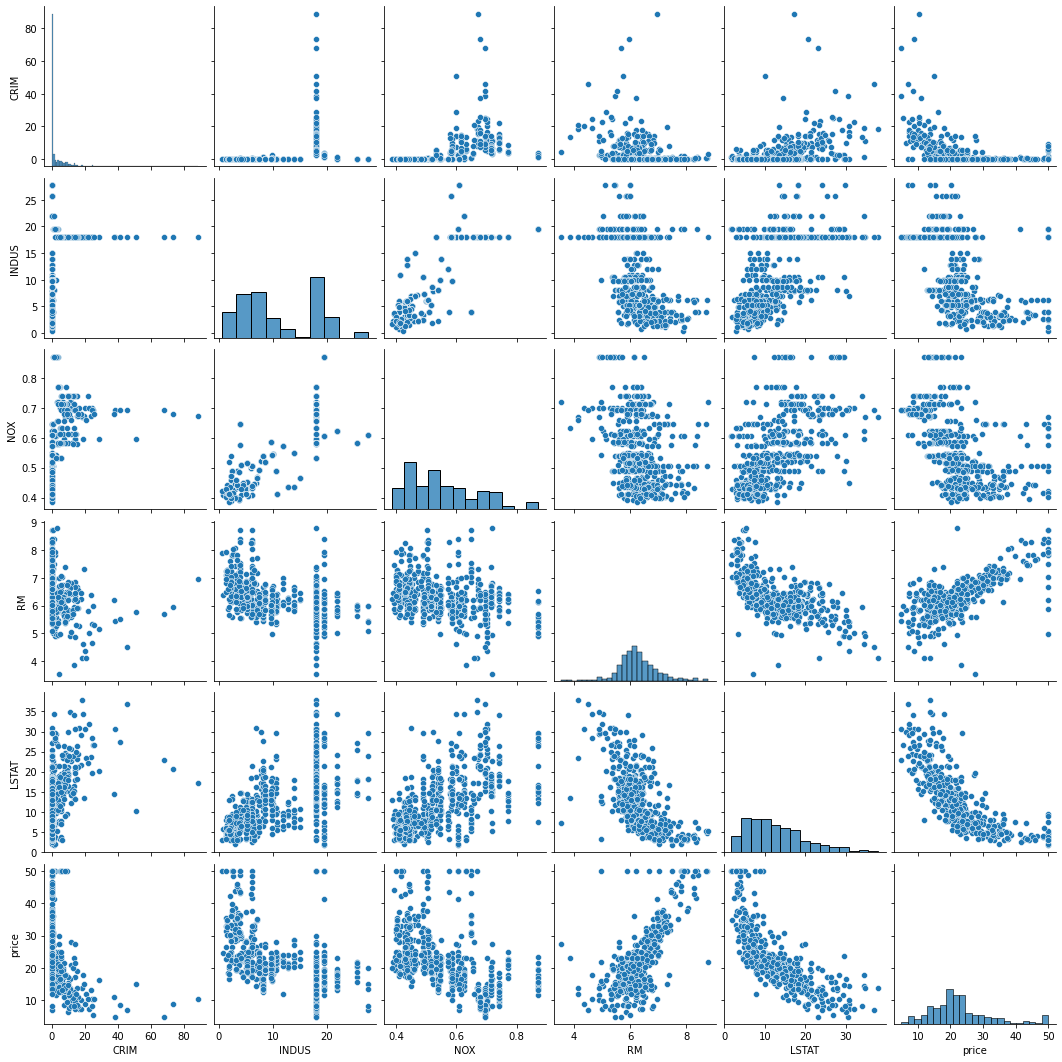

Wall time: 5.94 s


In [27]:
%%time 

sns.pairplot(df[['CRIM','INDUS','NOX','RM','LSTAT','price']])
plt.show()

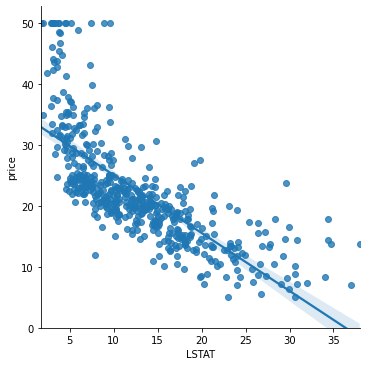

In [28]:
g= sns.lmplot(x='LSTAT', y='price', data=df)
g.set(ylim=(0, None))
plt.show() 
# 이는 linear로 단순히 그려보기에는 무리가 있어보인다... 

It seems that there is a non-linear relationship between price and LSTAT. We will explore this idea in our next ipynb: Polynomial regression.

In [29]:
#let's save this dataframe for our future exercises:
df.to_csv('boston_clean.csv',index=False)

### Train and Test set Split

In [30]:
y = df['price']
X = df.drop('price', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split # 알아서 train, test를 나눠준다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.798

In [34]:
X_train.shape, y_train

((404, 13),
 300    24.8
 32     13.2
 181    36.2
 272    24.4
 477    12.0
        ... 
 251    24.8
 192    36.4
 71     21.7
 87     22.2
 435    13.4
 Name: price, Length: 404, dtype: float64)

In [33]:
X_test.shape

(102, 13)

In [31]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91


## Linear Regression with Scikit-Learn


So far we have only worked with data frames using Pandas. Now we may need to transform our data into arrays by using numpy because sklearn uses arrays instead of data frames.



Scikit-learn is a very powerful package enabling you to do almost everything in machine learning including Regression, Classification, Clustering, SVM and Dimensionality reduction. However, I don't recommend sklearn for deep learning algorithms. Pytorch, Tensorflow and Keras are better alternatives for deep learning.

In [ ]:
# from sklearn.linear_model import LinearRegression

In [35]:
reg_model = LinearRegression()

In [36]:
reg_model

LinearRegression()

In [37]:
# 학습하기 
reg_model.fit(X_train, y_train) 

LinearRegression()

### Predictions:

In [38]:
# 예측한 값 
y_hat = reg_model.predict(X_test)

In [40]:
y_hat

array([21.28721939, 17.23169201, 15.50074937, 39.40324074, 25.38255596,
       32.7359478 ,  9.17206841, 37.24330393, 18.05643006, 17.32398345,
       34.83311938, 20.94984853, 28.67618178, 13.59105484, 25.635163  ,
       24.05426189, 21.72643142, 13.17515619, 17.24475931, 30.52800124,
       23.87596583, 16.08368633, 33.07338415, 19.31279942, 19.13055834,
       13.20161493, 20.72158623, 17.48530444, 23.2681365 , 12.98218176,
       35.21320262, 30.88533238, 20.40082529, 24.64557593, 18.61478937,
       25.39486852, 25.03289866, 34.56747801, 27.82728449, 15.01888768,
       21.04593597, 37.02676683,  8.86246192, 22.46800861, 22.93903849,
       28.24245417, 26.7727513 , 17.54255681, 19.03295403, 24.33920351,
       23.48354875, 26.84361857, 15.64217399, 17.97463834, 29.34531385,
       18.79531642, 23.07067877, 12.63711587, 17.12150905, 17.36958789,
       15.72068021, 25.31760755, 27.77053501, 11.62690437, 29.25159282,
       31.49975724, 22.62620238, 22.06651894, 27.00486139, 19.55

In [41]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head() # predictions: 예측값   /   resid: 실제값의 예측값과의 차이 

,actuals,predictions,resid
483,21.8,21.287219,0.512781
426,10.2,17.231692,-7.031692
22,15.2,15.500749,-0.300749
268,43.5,39.403241,4.096759
371,50.0,25.382556,24.617444


### Coefficients:

try reg_model.



In [42]:
# The coefficients of the regression
reg_model.coef_

array([-1.27947795e-01,  5.75316114e-02,  2.21875825e-03,  2.78683934e+00,
       -2.06744008e+01,  3.37509312e+00,  1.23545393e-04, -1.77457356e+00,
        3.11516569e-01, -1.08247434e-02, -1.05159118e+00,  8.40026939e-03,
       -5.05478185e-01])

In [43]:
# The intercept of the regression
reg_model.intercept_ # bias 

43.36838818964445

In [44]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,CRIM,-0.1279
1,ZN,0.0575
2,INDUS,0.0022
3,CHAS,2.7868
4,NOX,-20.6744
5,RM,3.3751
6,AGE,0.0001
7,DIS,-1.7746
8,RAD,0.3115
9,TAX,-0.0108


## Evaluation metrics:

One of the downsides of sklearn package is that, for linear regression models, the only built-in evaluation metric is R-squared (score). We need to mannually construct the other evaluation metrics like MSE, RMSE, adjusted R-squared, AIC, BIC, and etc.

Alternatively we could have used statsmodel package and get a nice summary table.

#### R-squared

In [45]:
# The train set R-squared of the regression
reg_model.score(X_train,y_train)

0.7484272373846235

In [46]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_test, y_test),3))

Training data R-squared: 0.748
Test data R-squared: 0.694


#### MSE and RMSE

This is the most common metric used for comparing linear regression models!

In [47]:
df_predictions.head()
# resid = actuals - predictions
# MSE => resid * resid    # 작을 수록 좋음 
# PMSE => Root Mean Squared Erro => MSE에 root 붙여준 것. 

,actuals,predictions,resid
483,21.8,21.287219,0.512781
426,10.2,17.231692,-7.031692
22,15.2,15.500749,-0.300749
268,43.5,39.403241,4.096759
371,50.0,25.382556,24.617444


In [48]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

26.082

In [49]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.107

## Cross Validation

Estimating the test set evaluation metrics using cross validation! Remember, we are interested in model performance in the test set not train set!!

In [50]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [51]:
# What metrics are available for cross validation in sklearn?
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [52]:
my_estimator = LinearRegression()

In [53]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")
# cv: k(?) 

In [54]:
R2

array([0.64095259, 0.70188733, 0.69301675, 0.76382877, 0.73940009])

In [55]:
R2_CV = np.mean(R2)
np.round(R2_CV,3)

0.708

In [56]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error") # scoring에는 클수록 좋은 값이 들어가야한다!
# 클수록 좋음 

In [57]:
MSE= -NMSE
MSE

array([33.49363219, 14.83051734, 20.95423932, 37.4838053 ,  9.84442331,
       24.5197077 , 13.88734797, 19.11258971, 25.99127302, 32.48326402])

In [58]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

23.26

In [59]:
RMSE = np.sqrt(MSE)
RMSE

array([5.78736833, 3.85104107, 4.57758007, 6.12240192, 3.1375824 ,
       4.95173785, 3.72657322, 4.37179479, 5.09816369, 5.69940909])

In [60]:
RMSE_CV = np.mean(RMSE)
np.round(RMSE_CV,3)

4.732

# Done!